# Class 4 Notebook – Unsupervised Learning: Hierarchical (Agglomerative) Clustering

This notebook demonstrates **Unsupervised Machine Learning** using **Hierarchical (Agglomerative) Clustering**.

Unlike supervised learning (Classes 2–3), unsupervised learning works with **unlabeled data**. Here, we will automatically group students based on:
- **Hours Studied**
- **Exam Score**

**Objective**: Automatically discover clusters of students (e.g., low/medium/high performers) using their study hours and exam scores.

**Model type**: Agglomerative (bottom‑up) hierarchical clustering.

**Key idea**: Each student starts as their own cluster. The algorithm repeatedly merges the two closest clusters until only a few remain. We can visualize this process with a **dendrogram**.

We will follow a clear step‑by‑step workflow:

1. Install/import libraries
2. Create student dataset (Hours Studied, Exam Score)
3. Visualize data (scatter plot)
4. Apply Agglomerative Clustering
5. Visualize clusters
6. Plot dendrogram and interpret cluster structure

Run the first code cell to confirm your environment works.

## Run in the browser (no local setup)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adzuci/ai-fundamentals/blob/class-4-unsupervised-learning/class-4-unsupervised-learning/02_class_4_hierarchical_clustering_basics.ipynb)

> Tip: This notebook assumes you're comfortable with basic Python, NumPy, Pandas, and Matplotlib from Classes 2 and 3.

## STEP 1: Install Required Libraries

If running locally, install the required packages. In Colab, these are already available.

In [1]:
# Install required libraries (run this if needed)
# Uncomment the line below if running locally and packages aren't installed
# !pip install numpy pandas matplotlib scikit-learn scipy

## STEP 2: Import Libraries

Import NumPy, Pandas, Matplotlib, scikit-learn's `AgglomerativeClustering`, and SciPy's dendrogram helpers.

In [2]:
# Environment sanity check + imports
import platform

print("Python:", platform.python_version())
print("OS:", platform.system(), platform.release())

try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.cluster import AgglomerativeClustering
    from scipy.cluster.hierarchy import dendrogram, linkage

    print("All libraries imported successfully!")
except ModuleNotFoundError as exc:
    print("Missing dependency:", exc)
    print("Install with: python -m pip install numpy pandas matplotlib scikit-learn scipy")
    raise

Python: 3.10.14
OS: Darwin 25.2.0
All libraries imported successfully!


## STEP 3: Create Student Dataset

We'll create a simple student dataset with:
- `Hours_Studied`
- `Exam_Score`

Notice: **No target/label column** — this is unsupervised learning!

In [3]:
# Create sample student data
data = {
    "Hours_Studied": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Exam_Score": [40, 45, 50, 55, 60, 70, 75, 80, 85, 90]
}

students_df = pd.DataFrame(data)
print("Student Data:")
print(students_df)
print("\nData shape:", students_df.shape)
print("Notice: No 'target' or 'label' column — this is unsupervised learning!")

Student Data:
   Hours_Studied  Exam_Score
0              1          40
1              2          45
2              3          50
3              4          55
4              5          60
5              6          70
6              7          75
7              8          80
8              9          85
9             10          90

Data shape: (10, 2)
Notice: No 'target' or 'label' column — this is unsupervised learning!


## STEP 4: Visualize Data (Before Clustering)

Let's see what the raw data looks like before applying clustering.

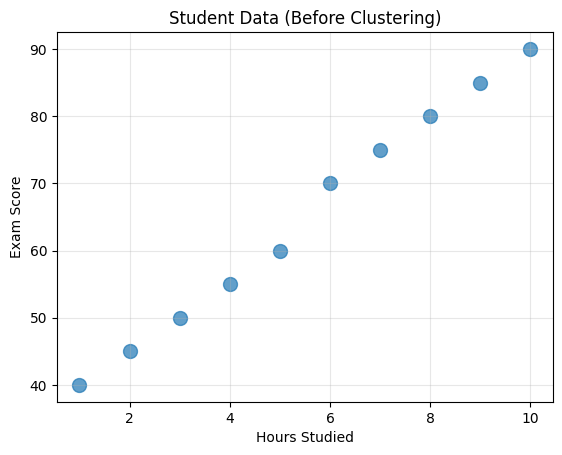

In [4]:
# Visualize the raw student data
plt.scatter(students_df["Hours_Studied"], students_df["Exam_Score"], s=100, alpha=0.7)
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Student Data (Before Clustering)")
plt.grid(True, alpha=0.3)
plt.show()

## STEP 5: Apply Agglomerative (Hierarchical) Clustering

We'll use `AgglomerativeClustering` to automatically find **3 clusters** in our data.

Key choices:
- `n_clusters=3`
- `linkage="ward"` (minimizes variance within each cluster; automatically uses euclidean distance)

In [5]:
# Prepare features (Hours_Studied, Exam_Score)
X = students_df[["Hours_Studied", "Exam_Score"]].values

# Create and fit the Agglomerative Clustering model
# Note: For 'ward' linkage, metric is automatically 'euclidean' (no need to specify)
agg_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
cluster_labels = agg_model.fit_predict(X)

students_df["Cluster"] = cluster_labels
print("Cluster labels added to DataFrame:")
print(students_df)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

## STEP 6: Visualize Clusters

Now we'll color each student by its cluster label to see how the algorithm grouped them.

In [ ]:
# Visualize clustered data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    students_df["Hours_Studied"],
    students_df["Exam_Score"],
    c=students_df["Cluster"],
    cmap="viridis",
    s=120,
    alpha=0.8,
    edgecolor="k"
)
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hierarchical Clustering of Students (Colored by Cluster)")
plt.grid(True, alpha=0.3)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

## STEP 7: Dendrogram (Understanding the Hierarchy)

A **dendrogram** shows how clusters are merged step by step. Each leaf is a student, and branches show which students/clusters were merged together.

We will use SciPy's `linkage` and `dendrogram` functions to visualize the hierarchy.

In [ ]:
# Compute linkage matrix for dendrogram
Z = linkage(X, method="ward")

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=[f"S{i}" for i in range(len(students_df))])
plt.title("Dendrogram for Student Clustering")
plt.xlabel("Student")
plt.ylabel("Distance (Ward linkage)")
plt.tight_layout()
plt.show()